In [4]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.metrics import accuracy_score

In [6]:
#cargamos el dataset y muestra las primeras filas
Datos = pd.read_csv('./winequality.csv')

In [7]:
# Realizamos lectura de los Datos para el análisis exploratorio
Datos.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [8]:
Datos.shape

(1599, 12)

In [9]:
Datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
#suma de valores nulos por columna
Datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

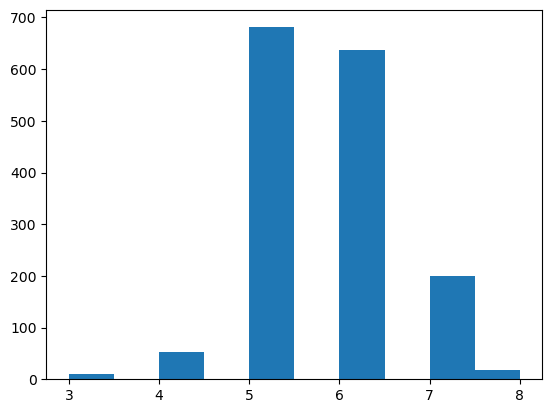

In [12]:
#cantidad respectoal nivel de calidad
plt.hist(Datos.quality)

(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

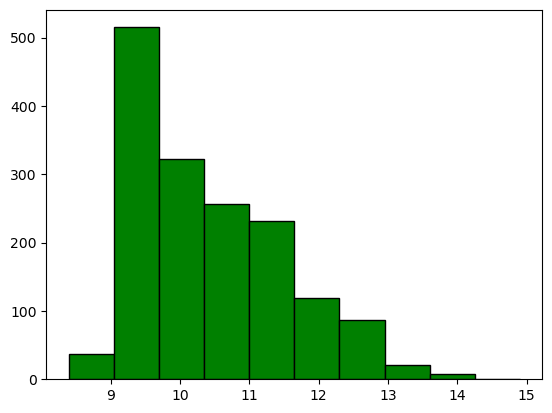

In [44]:
# Plotting y_test and y_pred to understand the spread.
plt.hist(Datos[ 'alcohol'], 10, color = "green", ec="black")


(array([994., 463.,  67.,  45.,  11.,   8.,   3.,   0.,   5.,   3.]),
 array([ 0.9 ,  2.36,  3.82,  5.28,  6.74,  8.2 ,  9.66, 11.12, 12.58,
        14.04, 15.5 ]),
 <BarContainer object of 10 artists>)

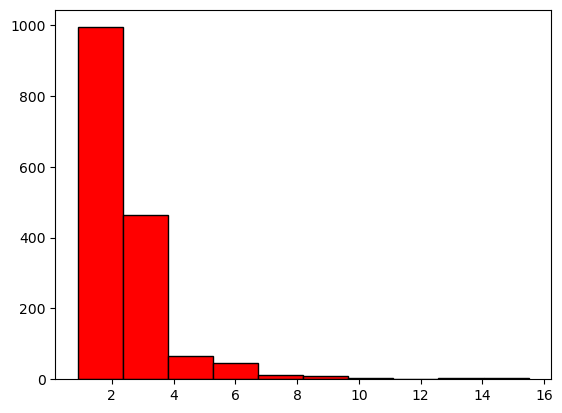

In [52]:
plt.hist(Datos[ 'residual sugar'], 10, color = "red", ec="black")

In [53]:
predictors_col = ["alcohol" , "residual sugar"]
targer_col = ['quality']

In [54]:
predictors = Datos[predictors_col]
target=Datos[targer_col]

In [55]:
predictors

,alcohol,residual sugar
0,9.4,1.9
1,9.8,2.6
2,9.8,2.3
3,9.8,1.9
4,9.4,1.9
...,...,...
1594,10.5,2.0
1595,11.2,2.2
1596,11.0,2.3
1597,10.2,2.0


In [56]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [58]:
corr = predictors.corr()
corr

,alcohol,residual sugar
alcohol,1.000000,0.042075
residual sugar,0.042075,1.000000


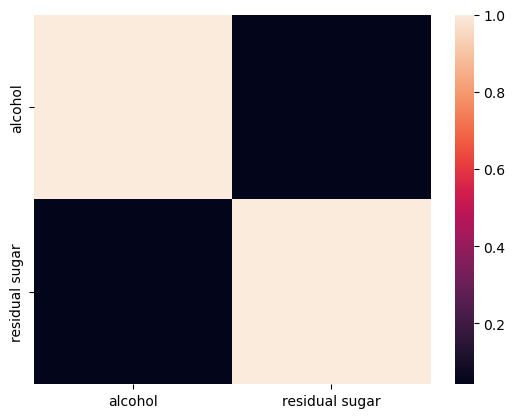

In [59]:
sns.heatmap (corr)
plt.show()

In [60]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=13)

In [61]:
tree = DecisionTreeClassifier()

In [62]:
arbol= tree.fit(x_train, y_train)

[Text(0.5231337014567281, 0.9736842105263158, 'x[0] <= 10.525\ngini = 0.646\nsamples = 1279\nvalue = [9, 45, 535, 514, 164, 12]'),
 Text(0.2605411779375344, 0.9210526315789473, 'x[0] <= 9.925\ngini = 0.546\nsamples = 774\nvalue = [6, 29, 450, 260, 29, 0]'),
 Text(0.09349739440011007, 0.868421052631579, 'x[0] <= 9.075\ngini = 0.492\nsamples = 539\nvalue = [4, 20, 350, 157, 8, 0]'),
 Text(0.012658227848101266, 0.8157894736842105, 'x[0] <= 9.025\ngini = 0.569\nsamples = 34\nvalue = [1, 2, 13, 18, 0, 0]'),
 Text(0.010456796917996699, 0.7631578947368421, 'x[0] <= 8.45\ngini = 0.545\nsamples = 33\nvalue = [1, 1, 13, 18, 0, 0]'),
 Text(0.004402861860209136, 0.7105263157894737, 'x[1] <= 1.95\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 0, 1, 0, 0]'),
 Text(0.002201430930104568, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1, 0, 0]'),
 Text(0.006604292790313704, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0, 0, 0]'),
 Text(0.01651073197578426, 0.71052631578947

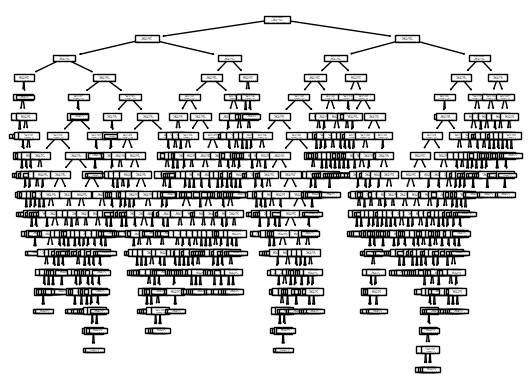

In [63]:
plot_tree(arbol)

In [64]:
predicciones = arbol.predict(x_test)

In [65]:
predicciones

array([6, 6, 5, 6, 5, 5, 5, 8, 5, 7, 5, 5, 5, 5, 3, 5, 5, 6, 5, 6, 5, 5,
       6, 6, 6, 5, 5, 5, 4, 8, 6, 6, 5, 6, 5, 6, 4, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 7, 5, 6, 5, 7, 6, 5, 7, 6, 5, 7, 5, 5, 5, 5, 5, 5, 6, 7,
       6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 7, 6,
       6, 6, 6, 6, 4, 6, 5, 6, 5, 6, 5, 7, 6, 6, 6, 5, 6, 7, 6, 5, 5, 6,
       6, 6, 5, 5, 5, 5, 6, 7, 6, 6, 5, 6, 5, 8, 6, 6, 5, 5, 6, 4, 5, 5,
       5, 7, 6, 5, 7, 5, 6, 7, 5, 5, 4, 6, 5, 6, 6, 5, 5, 5, 5, 7, 5, 5,
       5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 7, 6, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 6, 5, 6, 6, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 7, 7,
       5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 8, 6, 6,
       5, 5, 6, 6, 7, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 8, 5, 5, 6, 6, 6, 5, 5, 6, 6, 7, 5, 5, 5, 5, 6, 8, 5,
       6, 6, 5, 7, 7, 5, 6, 6, 7, 5, 6, 3, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5,
       6, 6, 5, 5, 6, 6, 5, 4, 5, 5, 5, 5, 5, 6, 5,

In [66]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['predicciones'])

predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,1,0,0,0
4,0,0,4,4,0,0
5,1,4,99,34,7,1
6,0,2,49,61,8,4
7,1,1,8,14,10,1
8,0,0,3,1,2,0


In [68]:
#acorde al resultado es deficiente, una mla prediccion del modelo y valores promedios quie ponen en duda la aplicacion del modelo para el ejercicio..allanla exactitud del modelo..se debe ajustar el % de datos paera test para entrenar con menod valores
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.53125